In [188]:
import numpy as np      # For arrays
import pandas as pd     # Dataframes and manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [189]:
print(sales.shape)
print(sales.info())

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [190]:
# Change name format to have underscore
sales.rename(columns={
    "Invoice ID": "Invoice_ID",
    "Customer type": "Customer_type",
    "Product line": "Product_line",
    "Unit price": "Unit_price",
    "Tax 5%": "Tax_5%",
    "gross margin percentage": "gross_margin_percentage",
    "gross income": "gross_income"
}, inplace=True)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [191]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["Total"])
y = sales["Total"]

seed = np.random.randint(0, 1000)
print(seed)

285


In [192]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 16), (300, 16))

In [193]:
X_train.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
362,471-41-2823,C,Naypyitaw,Normal,Male,Food and beverages,99.79,2,9.9790,3/7/2019,20:37,Ewallet,199.58,4.761905,9.9790,8.0
599,334-64-2006,A,Yangon,Member,Female,Home and lifestyle,70.32,2,7.0320,3/24/2019,14:22,Ewallet,140.64,4.761905,7.0320,9.6
461,234-03-4040,B,Mandalay,Member,Female,Food and beverages,73.05,10,36.5250,3/3/2019,12:25,Credit card,730.50,4.761905,36.5250,8.7
457,533-33-5337,B,Mandalay,Normal,Male,Electronic accessories,79.39,10,39.6950,2/7/2019,20:24,Cash,793.90,4.761905,39.6950,6.2


In [194]:
y_train.head()

994     63.9975
362    209.5590
599    147.6720
461    767.0250
457    833.5950
Name: Total, dtype: float64

In [195]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 994 to 673
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               700 non-null    object 
 1   Branch                   700 non-null    object 
 2   City                     700 non-null    object 
 3   Customer_type            700 non-null    object 
 4   Gender                   700 non-null    object 
 5   Product_line             700 non-null    object 
 6   Unit_price               700 non-null    float64
 7   Quantity                 700 non-null    int64  
 8   Tax_5%                   700 non-null    float64
 9   Date                     700 non-null    object 
 10  Time                     700 non-null    object 
 11  Payment                  700 non-null    object 
 12  cogs                     700 non-null    float64
 13  gross_margin_percentage  700 non-null    float64
 14  gross_income             700 

In [196]:
X_train_copy.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

In [197]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
994,60.95,1,3.0475,60.95,4.761905,3.0475,5.9
362,99.79,2,9.9790,199.58,4.761905,9.9790,8.0
599,70.32,2,7.0320,140.64,4.761905,7.0320,9.6
461,73.05,10,36.5250,730.50,4.761905,36.5250,8.7
457,79.39,10,39.6950,793.90,4.761905,39.6950,6.2


In [198]:
num_data.describe()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,55.946214,5.485714,15.421912,308.438243,4.761905e+00,15.421912,6.954143
std,26.627647,2.907948,11.791458,235.829152,5.244000e-14,11.791458,1.721212
min,10.080000,1.000000,0.508500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.247500,3.000000,5.982250,119.645000,4.761905e+00,5.982250,5.500000
50%,55.475000,5.000000,12.088000,241.760000,4.761905e+00,12.088000,6.900000
75%,78.380000,8.000000,22.843125,456.862500,4.761905e+00,22.843125,8.425000
max,99.960000,10.000000,49.650000,993.000000,4.761905e+00,49.650000,10.000000


<Axes: ylabel='Unit_price'>

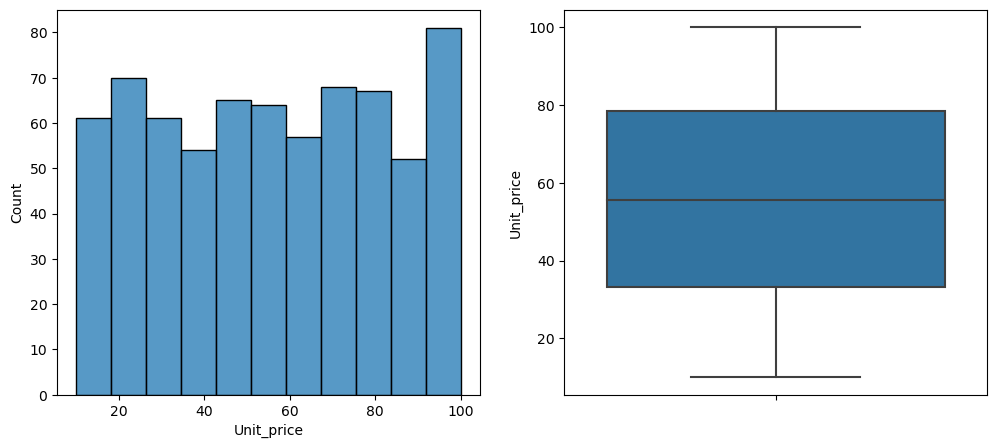

In [199]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="Unit_price", ax=ax[0])
sns.boxplot(data=X_train_copy, y="Unit_price", ax=ax[1])

In [200]:
def visualize_numeric_feature(dataframe, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

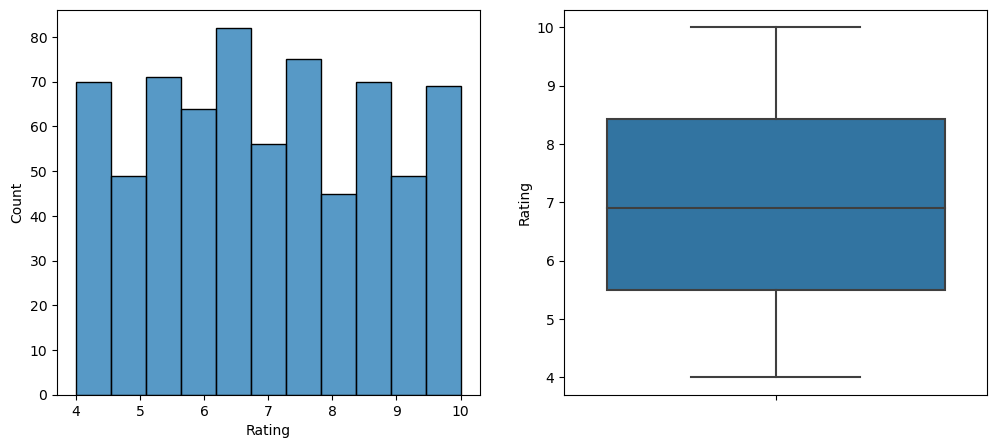

In [201]:
visualize_numeric_feature(X_train_copy, 'Rating')

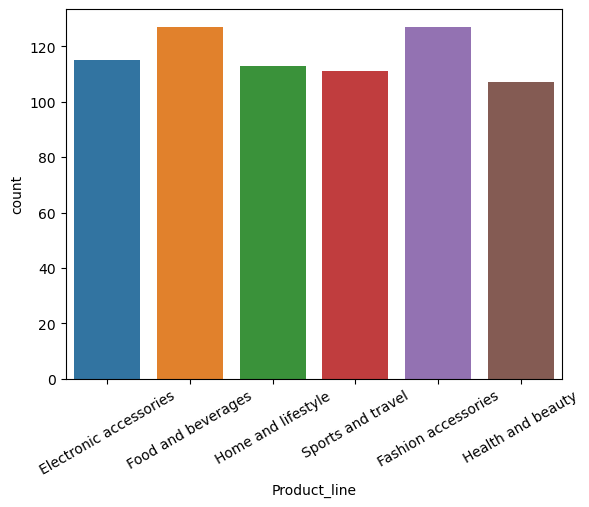

In [202]:
sns.countplot(data=X_train_copy, x="Product_line")
plt.xticks(rotation=30);

In [203]:
cat_feature = X_train_copy.select_dtypes(include=["object"])
cat_feature.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,2/18/2019,11:40,Ewallet
362,471-41-2823,C,Naypyitaw,Normal,Male,Food and beverages,3/7/2019,20:37,Ewallet
599,334-64-2006,A,Yangon,Member,Female,Home and lifestyle,3/24/2019,14:22,Ewallet
461,234-03-4040,B,Mandalay,Member,Female,Food and beverages,3/3/2019,12:25,Credit card
457,533-33-5337,B,Mandalay,Normal,Male,Electronic accessories,2/7/2019,20:24,Cash


In [204]:
cat_feature.describe()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
count,700,700,700,700,700,700,700,700,700
unique,700,3,3,2,2,6,89,422,3
top,652-49-6720,A,Yangon,Member,Male,Food and beverages,2/7/2019,11:40,Cash
freq,1,246,246,360,359,127,16,5,242


In [205]:
cat_feature.isnull().sum()

Invoice_ID       0
Branch           0
City             0
Customer_type    0
Gender           0
Product_line     0
Date             0
Time             0
Payment          0
dtype: int64

In [206]:
pd.unique(cat_feature["Product_line"])

array(['Electronic accessories', 'Food and beverages',
       'Home and lifestyle', 'Sports and travel', 'Fashion accessories',
       'Health and beauty'], dtype=object)

In [207]:
#X_train_copy['Product_line'] = X_train_copy['Product_line'].map({
#    'Electronic accessories': 'EA',
#    'Health and beauty': 'HAB',
#    'Fashion accessories': 'FA',
#    'Sports and travel': 'SAT',
#    'Food and beverages': 'FAB',
#    'Home and lifestyle': 'HAL'
#})

#pd.unique(X_train_copy['Product_line'])

In [208]:
X_train_copy.groupby(by=['City', 'Product_line']).size()

City       Product_line          
Mandalay   Electronic accessories    39
           Fashion accessories       46
           Food and beverages        38
           Health and beauty         38
           Home and lifestyle        36
           Sports and travel         37
Naypyitaw  Electronic accessories    35
           Fashion accessories       45
           Food and beverages        44
           Health and beauty         33
           Home and lifestyle        31
           Sports and travel         32
Yangon     Electronic accessories    41
           Fashion accessories       36
           Food and beverages        45
           Health and beauty         36
           Home and lifestyle        46
           Sports and travel         42
dtype: int64

In [209]:
# Handling categorical data
cat_feats = X_train.select_dtypes(include=['object'])
cat_feats.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,2/18/2019,11:40,Ewallet
362,471-41-2823,C,Naypyitaw,Normal,Male,Food and beverages,3/7/2019,20:37,Ewallet
599,334-64-2006,A,Yangon,Member,Female,Home and lifestyle,3/24/2019,14:22,Ewallet
461,234-03-4040,B,Mandalay,Member,Female,Food and beverages,3/3/2019,12:25,Credit card
457,533-33-5337,B,Mandalay,Normal,Male,Electronic accessories,2/7/2019,20:24,Cash


In [210]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [211]:
ohe_feature_name = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_name

array(['Invoice_ID_101-17-6199', 'Invoice_ID_101-81-4070',
       'Invoice_ID_102-06-2002', ..., 'Payment_Cash',
       'Payment_Credit card', 'Payment_Ewallet'], dtype=object)

In [212]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
0,60.95,1,3.0475,60.95,4.761905,3.0475,5.9
1,99.79,2,9.9790,199.58,4.761905,9.9790,8.0
2,70.32,2,7.0320,140.64,4.761905,7.0320,9.6
3,73.05,10,36.5250,730.50,4.761905,36.5250,8.7
4,79.39,10,39.6950,793.90,4.761905,39.6950,6.2


In [213]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_name)
X_train_cat_ohe.head()

,Invoice_ID_101-17-6199,Invoice_ID_101-81-4070,Invoice_ID_102-06-2002,Invoice_ID_102-77-2261,Invoice_ID_105-10-6182,Invoice_ID_106-35-6779,Invoice_ID_110-48-7033,Invoice_ID_114-35-5271,Invoice_ID_115-38-7388,Invoice_ID_115-99-4379,...,Time_20:43,Time_20:48,Time_20:50,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [214]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating,Invoice_ID_101-17-6199,Invoice_ID_101-81-4070,Invoice_ID_102-06-2002,...,Time_20:43,Time_20:48,Time_20:50,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,60.95,1,3.0475,60.95,4.761905,3.0475,5.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,99.79,2,9.9790,199.58,4.761905,9.9790,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,70.32,2,7.0320,140.64,4.761905,7.0320,9.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73.05,10,36.5250,730.50,4.761905,36.5250,8.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,79.39,10,39.6950,793.90,4.761905,39.6950,6.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [215]:
final_columns = X_train_final.columns.values
final_columns

array(['Unit_price', 'Quantity', 'Tax_5%', ..., 'Payment_Cash',
       'Payment_Credit card', 'Payment_Ewallet'], dtype=object)

In [216]:
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_name)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating,Invoice_ID_101-17-6199,Invoice_ID_101-81-4070,Invoice_ID_102-06-2002,...,Time_20:43,Time_20:48,Time_20:50,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,73.82,4,14.7640,295.28,4.761905,14.7640,6.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,52.75,3,7.9125,158.25,4.761905,7.9125,9.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,74.66,4,14.9320,298.64,4.761905,14.9320,8.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,97.94,1,4.8970,97.94,4.761905,4.8970,6.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12.78,1,0.6390,12.78,4.761905,0.6390,9.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='Total', ylabel='Count'>

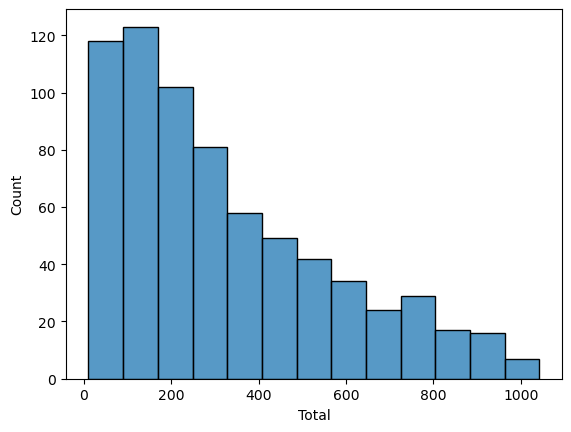

In [217]:
# Modeling

sns.histplot(y_train)

In [218]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate

In [219]:
def train_and_eval_model(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'), )
    print('Model', model)
    r2_scores = cv_results['test_r2']
    print("R2 CV scores:", r2_scores)
    print("R2 CV scores mean / stdev:", np.mean(r2_scores), '/', np.std(r2_scores))
    
    rmse = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse]
    print("RMSE CV scores:", rmse_scores)
    print("RMSE CV scores mean / stdev:", np.mean(rmse_scores), '/', np.std(rmse_scores))
    

In [220]:
rf = RandomForestRegressor(random_state=seed)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model RandomForestRegressor(random_state=285)
R2 CV scores: [0.99994687 0.99992245 0.99991649 0.99990663 0.9999188 ]
R2 CV scores mean / stdev: 0.9999222493314912 / 1.338057304207843e-05
RMSE CV scores: [1.6415744514938908, 2.209085305001621, 2.32875730770593, 2.3807674895792075, 2.274396762398052]
RMSE CV scores mean / stdev: 2.1669162632357404 / 0.268789574065531


In [221]:
gb = GradientBoostingRegressor(random_state=seed)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model GradientBoostingRegressor(random_state=285)
R2 CV scores: [0.99990812 0.99988054 0.99990387 0.99990843 0.99989429]
R2 CV scores mean / stdev: 0.9998990500639724 / 1.0574200370313353e-05
RMSE CV scores: [2.1587243452629385, 2.74178572688722, 2.498547666432609, 2.3577274823235346, 2.5951196477293643]
RMSE CV scores mean / stdev: 2.470380973727133 / 0.19991713413250847


In [222]:
hgb = HistGradientBoostingRegressor(random_state=seed)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model HistGradientBoostingRegressor(random_state=285)
R2 CV scores: [0.99922633 0.99883548 0.99887305 0.99868341 0.99922377]
R2 CV scores mean / stdev: 0.9989684068194519 / 0.00021896208944510685
RMSE CV scores: [6.264316294607614, 8.560306234788559, 8.555017344973992, 8.940103639680759, 7.032116952292237]
RMSE CV scores mean / stdev: 7.870372093268631 / 1.0364517095835049


In [223]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=seed)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=285, ...)
R2 CV scores: [0.99944797 0.99961882 0.99938658 0.99952135 0.99908914]
R2 CV scores mean / stdev: 0.999412769932365 / 0.00017939200967226134
RMSE CV scores: [5.29151192262836, 4.897593774268929, 6.311717764194515, 5.390448264758017, 7.6175756449626455]
R